This notebook concentrates the exercises from the Chapter 2: End-to-End Machine Learning Project.

In [1]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.svm import SVR
from summarytools import dfSummary

os.chdir(os.path.abspath(os.path.join('..')))

from src.utils import fetch_housing_data, fetch_california_map
from src.cfg.config import HOUSING_PATH, IMAGE_PATH

In [2]:
%load_ext autoreload
%autoreload 2

plt.style.use('ggplot')

In [ ]:
fetch_housing_data()

In [3]:
df = pd.read_csv(f'{HOUSING_PATH}/housing.csv', sep=',')

In [4]:
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [6]:
df.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


In [7]:
dfSummary(df)

No,Variable,Stats / Values,Freqs / (% of Valid),Graph,Missing
1,longitude[float64],Mean (sd) : -119.6 (2.0)min < med < max:-124.3 < -118.5 < -114.3IQR (CV) : 3.8 (-59.7),844 distinct values,"<img src = ""data:image/png;base64, iVBORw0KGgoAAAANSUhEUgAAAKoAAABGCAYAAABc8A97AAAAOXRFWHRTb2Z0d2FyZQBNYXRwbG90bGliIHZlcnNpb24zLjcuMywgaHR0cHM6Ly9tYXRwbG90bGliLm9yZy/OQEPoAAAACXBIWXMAAA9hAAAPYQGoP6dpAAABpUlEQVR4nO3cMU7DMBiGYYMYuoAydO8OQ6/AGSrOmTNwAu7QnaFj6VJGxICK4lT15zzPHsnDK7lO//jufD4XaN39rRcA/yFUIjzcegH8ttlsXodhWE99/nA4fO73+/cZl9QEoTZmGIb1brf7mvr8OI6TI2+ZrZ8IQiWCUIkgVCIIlQhCJYJQiSBUIgiVCEIlglCJIFQiCJUIQiWCUIkgVCI0PThdM+3e66T7UjUdas20e6+T7ktl6yeCUIkgVCIIlQhCJYJQiSBUIgiVCEIlglCJIFQiCJUIQiWCUIkgVCIIlQhND06nqvky4XQ6vZRSPmZeUjyhXkHllwmPc6+nB7Z+IgiVCEIlglCJIFQiOPV35ng8Pm+327cpz7Z8aYdQO7NarZ56vLTD1k8EoRJBqEQQKhG6PUzVnH5LafsEvERXDbVmiqiUukmimtNvKW2fgJfoqqHWTBGVYpKIH36jEkGoRBAqEbo99deqeWvgc5L5CfUPlf+ZOwTOzNZPBKESQahEECoRhEoEoRJBqEQQKhEuvvB34ddytDzDezFUF34tR8szvN/VDHFUiyC6TQAAAABJRU5ErkJggg=="">",0(0.0%)
2,latitude[float64],Mean (sd) : 35.6 (2.1)min < med < max:32.5 < 34.3 < 42.0IQR (CV) : 3.8 (16.7),862 distinct values,"<img src = ""data:image/png;base64, iVBORw0KGgoAAAANSUhEUgAAAKoAAABGCAYAAABc8A97AAAAOXRFWHRTb2Z0d2FyZQBNYXRwbG90bGliIHZlcnNpb24zLjcuMywgaHR0cHM6Ly9tYXRwbG90bGliLm9yZy/OQEPoAAAACXBIWXMAAA9hAAAPYQGoP6dpAAABo0lEQVR4nO3cMU4CQRiG4dVY0Gi2oKfXYm9gPAPxjJScwRN4B3oLSqTBzkqCzrBxv9nn6YcQ8ib/7pCZm9Pp1MHU3f73F4DfECoR7sb88NVq9dL3/bJ0/X6//9jtdm9X/EqEGjXUvu+X6/X6s3T9drstjpy2GP1EECoRhEoEoRJBqEQQKhGESgShEkGoRBAqEYRKBKESQahEECoRhEoEoRJBqEQQKhGESgShEkGoRBAqEYRKBKESQahEECoRhEoEoRJBqEQQKhFGvXZyrmruhXUn7M+EOoKae2HdCfszo58IQiWCUIkgVCIIlQhCJYJQiSBUIgiVCEIlglCJIFQiCJUIQiWCUIkgVCIIlQhCJYJQiSBUIlw83FdzovJ4PD51XfdesnauDofD4zAMr6XrWz3FejHUyhOV9yXr5myxWDyU/t5d1+4pVqOfCM71n+GRZ1qEeoZHnmkx+okgVCJMevTXbNW0uk0zV5MOtWarptVtmrmadKg1ajfOU9/cW51CzYZ6hY3zyDf3VqdQs6Hyd1P++1aofKudQpvN5nkYhlFu2v4C8wN/V773oDIAAAAASUVORK5CYII="">",0(0.0%)
3,housing_median_age[float64],Mean (sd) : 28.6 (12.6)min < med < max:1.0 < 29.0 < 52.0IQR (CV) : 19.0 (2.3),52 distinct values,"<img src = ""data:image/png;base64, iVBORw0KGgoAAAANSUhEUgAAAKoAAABGCAYAAABc8A97AAAAOXRFWHRTb2Z0d2FyZQBNYXRwbG90bGliIHZlcnNpb24zLjcuMywgaHR0cHM6Ly9tYXRwbG90bGliLm9yZy/OQEPoAAAACXBIWXMAAA9hAAAPYQGoP6dpAAABq0lEQVR4nO3cMU7DMACGUYMYuoAydO8OQ6/AGSrO2TNwAu7QnaFj6VImKjHQojhR/Vvv7ZE8fIodx8nd6XQq0Lr7Ww8A/kOoRHi49QD4bbVavQ7DsBx7/X6//9ztdu8TDqkJQm3MMAzLzWbzNfb67XY7OvKWmfqJIFQiCJUIQiWCUIkgVCIIlQhCJYJQiSBUIgiVCEIlglCJIFQiCJUI3Z5HdQC5L92G6gByX0z9ROj2jlrrcDg8r9frtzHXWjZMT6h/WCwWT2OXDpYN0zP1E8EddQY1y4bj8fhSSvmYeEjxhDqDymXD49Tj6UHTodbshboz9aXpUGv2Qt2Z+uJhighCJYJQidD0GpUsNQ+/197mCbUzt3z1W/nwezFwoXam11e/1qhEECoRhEoEoRLBwxRnNTsGpcx7vkKonNXsGJQy7/kKUz8RhEoEoRJBqEQQKhGESgShEmHWfdTaH5X5QI8fs4Y6wY/KfKBHKcXUTwihEkGoRBAqEYRKBKES4er2lB+V0YKrofpRGS0w9RNBqEQQKhGESgShEkGoRBAqEYRKBKESQahEECoRvgGPHXpuXo9FgwAAAABJRU5ErkJggg=="">",0(0.0%)
4,total_rooms[float64],Mean (sd) : 2635.8 (2181.6)min < med < max:2.0 < 2127.0 < 39320.0IQR (CV) : 1700.2 (1.2),"5,926 distinct values","<img src = ""data:image/png;base64, iVBORw0KGgoAAAANSUhEUgAAAKoAAABGCAYAAABc8A97AAAAOXRFWHRTb2Z0d2FyZQBNYXRwbG90bGliIHZlcnNpb24zLjcuMywgaHR0cHM6Ly9tYXRwbG90bGliLm9yZy/OQEPoAAAACXBIWXMAAA9hAAAPYQGoP6dpAAABR0lEQVR4nO3ZIU4DURRAUSAVVWREfT2mW2ANE9Y5a2Ar4ytGtqpYgimZ0sAl5+j5L0/c5CfzHy+XywP8dU+/vQB8h1BJ2Fz7YL/fvw7DsFszfFmW4zzP72vOwmdXQx2GYTeO43nN8GmaVgUOX7n6SRAqCUIlQagkCJUEoZIgVBKESoJQSRAqCUIlQagkCJUEoZIgVBKESoJQSRAqCUIlQagkCJUEoZIgVBKESoJQSRAqCUIlQagkCJUEoZIgVBKESoJQSRAqCUIlQagkCJUEoZIgVBKESoJQSRAqCUIlQagkCJUEoZIgVBKESoJQSRAqCUIlQagkCJUEoZIgVBI29xx+Op1eDofD29rzy7Ic53l+/8GViLprqNvt9nkcx/Pa89M07X5yH7pc/SQIlQShkiBUEoRKglBJECoJd/2PeqtbHgw8FvwvH5hkKjvZJnU/AAAAAElFTkSuQmCC"">",0(0.0%)
5,total_bedrooms[float64],Mean (sd) : 537.9 (421.4)min < med < max:1.0 < 435.0 < 6445.0IQR (CV) : 351.0 (1.3),"1,923 distinct values","<img src = ""data:image/png;base64, iVBORw0KGgoAAAANSUhEUgAAAKoAAABGCAYAAABc8A97AAAAOXRFWHRTb2Z0d2FyZQBNYXRwbG90bGliIHZlcnNpb24zLjcuMywgaHR0cHM6Ly9tYXRwbG90bGliLm9yZy/OQEPoAAAACX

Creating the Test Set before exploring further:

In [8]:
X_train, X_test, y_train, y_test = train_test_split(
    df.drop('median_house_value', axis=1),
    df['median_house_value'],
    test_size=0.2,
    random_state=42
)

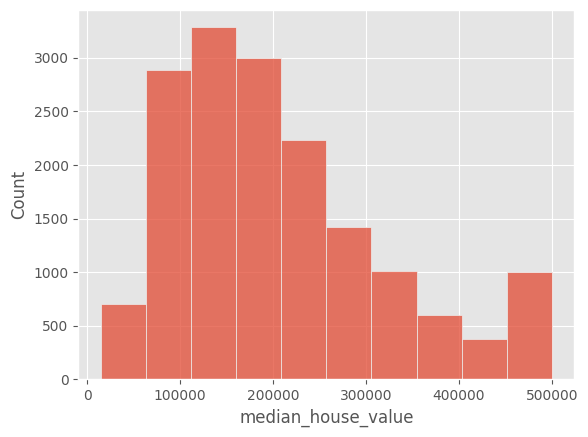

In [9]:
sns.histplot(y_train, bins=10);

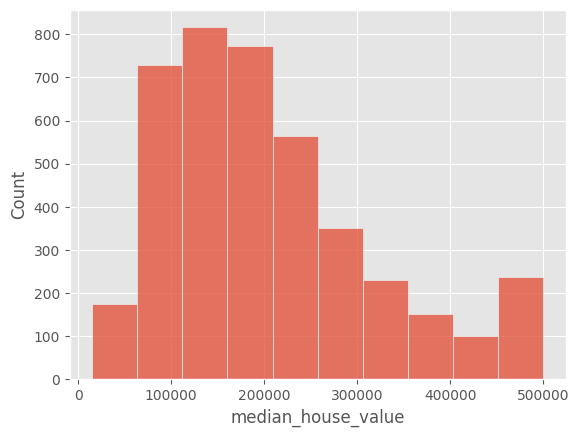

In [10]:
sns.histplot(y_test, bins=10);

Visualizing the data

In [11]:
df.columns

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value', 'ocean_proximity'],
      dtype='object')

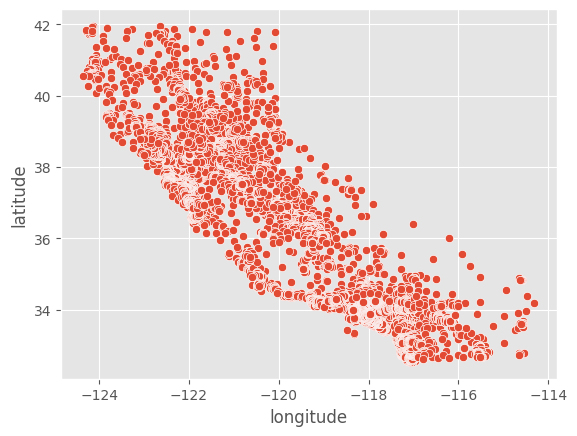

In [12]:
sns.scatterplot(df, x='longitude', y='latitude');

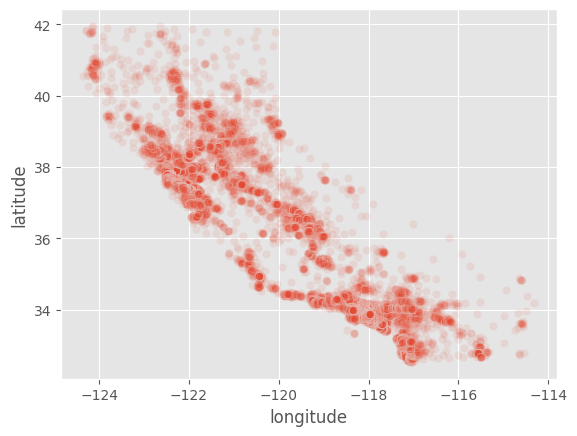

In [13]:
sns.scatterplot(df, x='longitude', y='latitude', alpha=0.1);

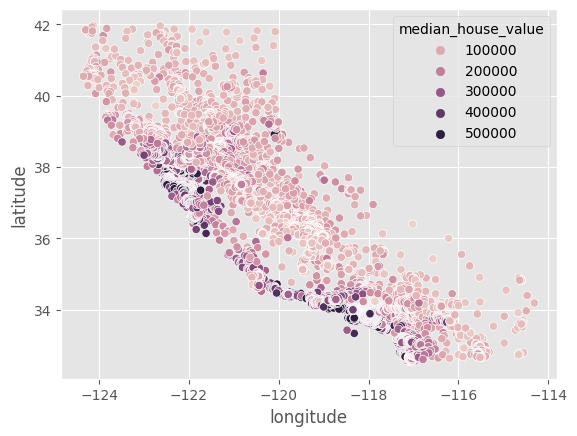

In [14]:
sns.scatterplot(df, x='longitude', y='latitude', hue='median_house_value');

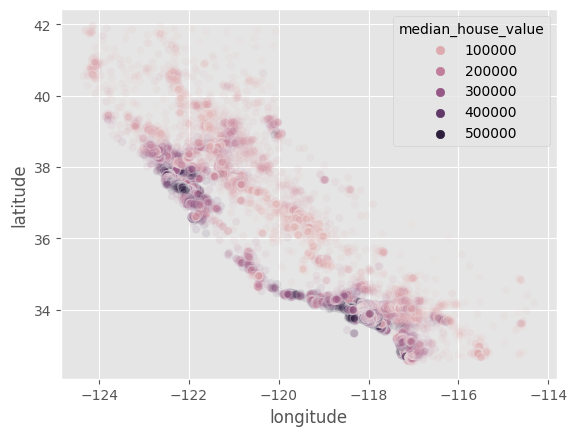

In [15]:
sns.scatterplot(df, x='longitude', y='latitude', hue='median_house_value', alpha=0.1);

In [16]:
# fetch_california_map()
california_img = mpimg.imread(os.path.join(IMAGE_PATH, 'california.png'))

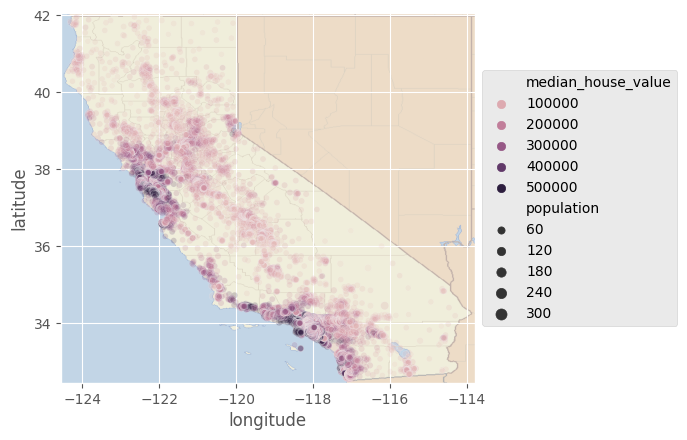

In [17]:
ax = sns.scatterplot(
    df, x="longitude", y="latitude",
    size=df['population']/100,
    hue="median_house_value", alpha=0.2
);
plt.imshow(california_img, extent=[-124.55, -113.80, 32.45, 42.05], alpha=0.5);
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5));

Looking for correlations

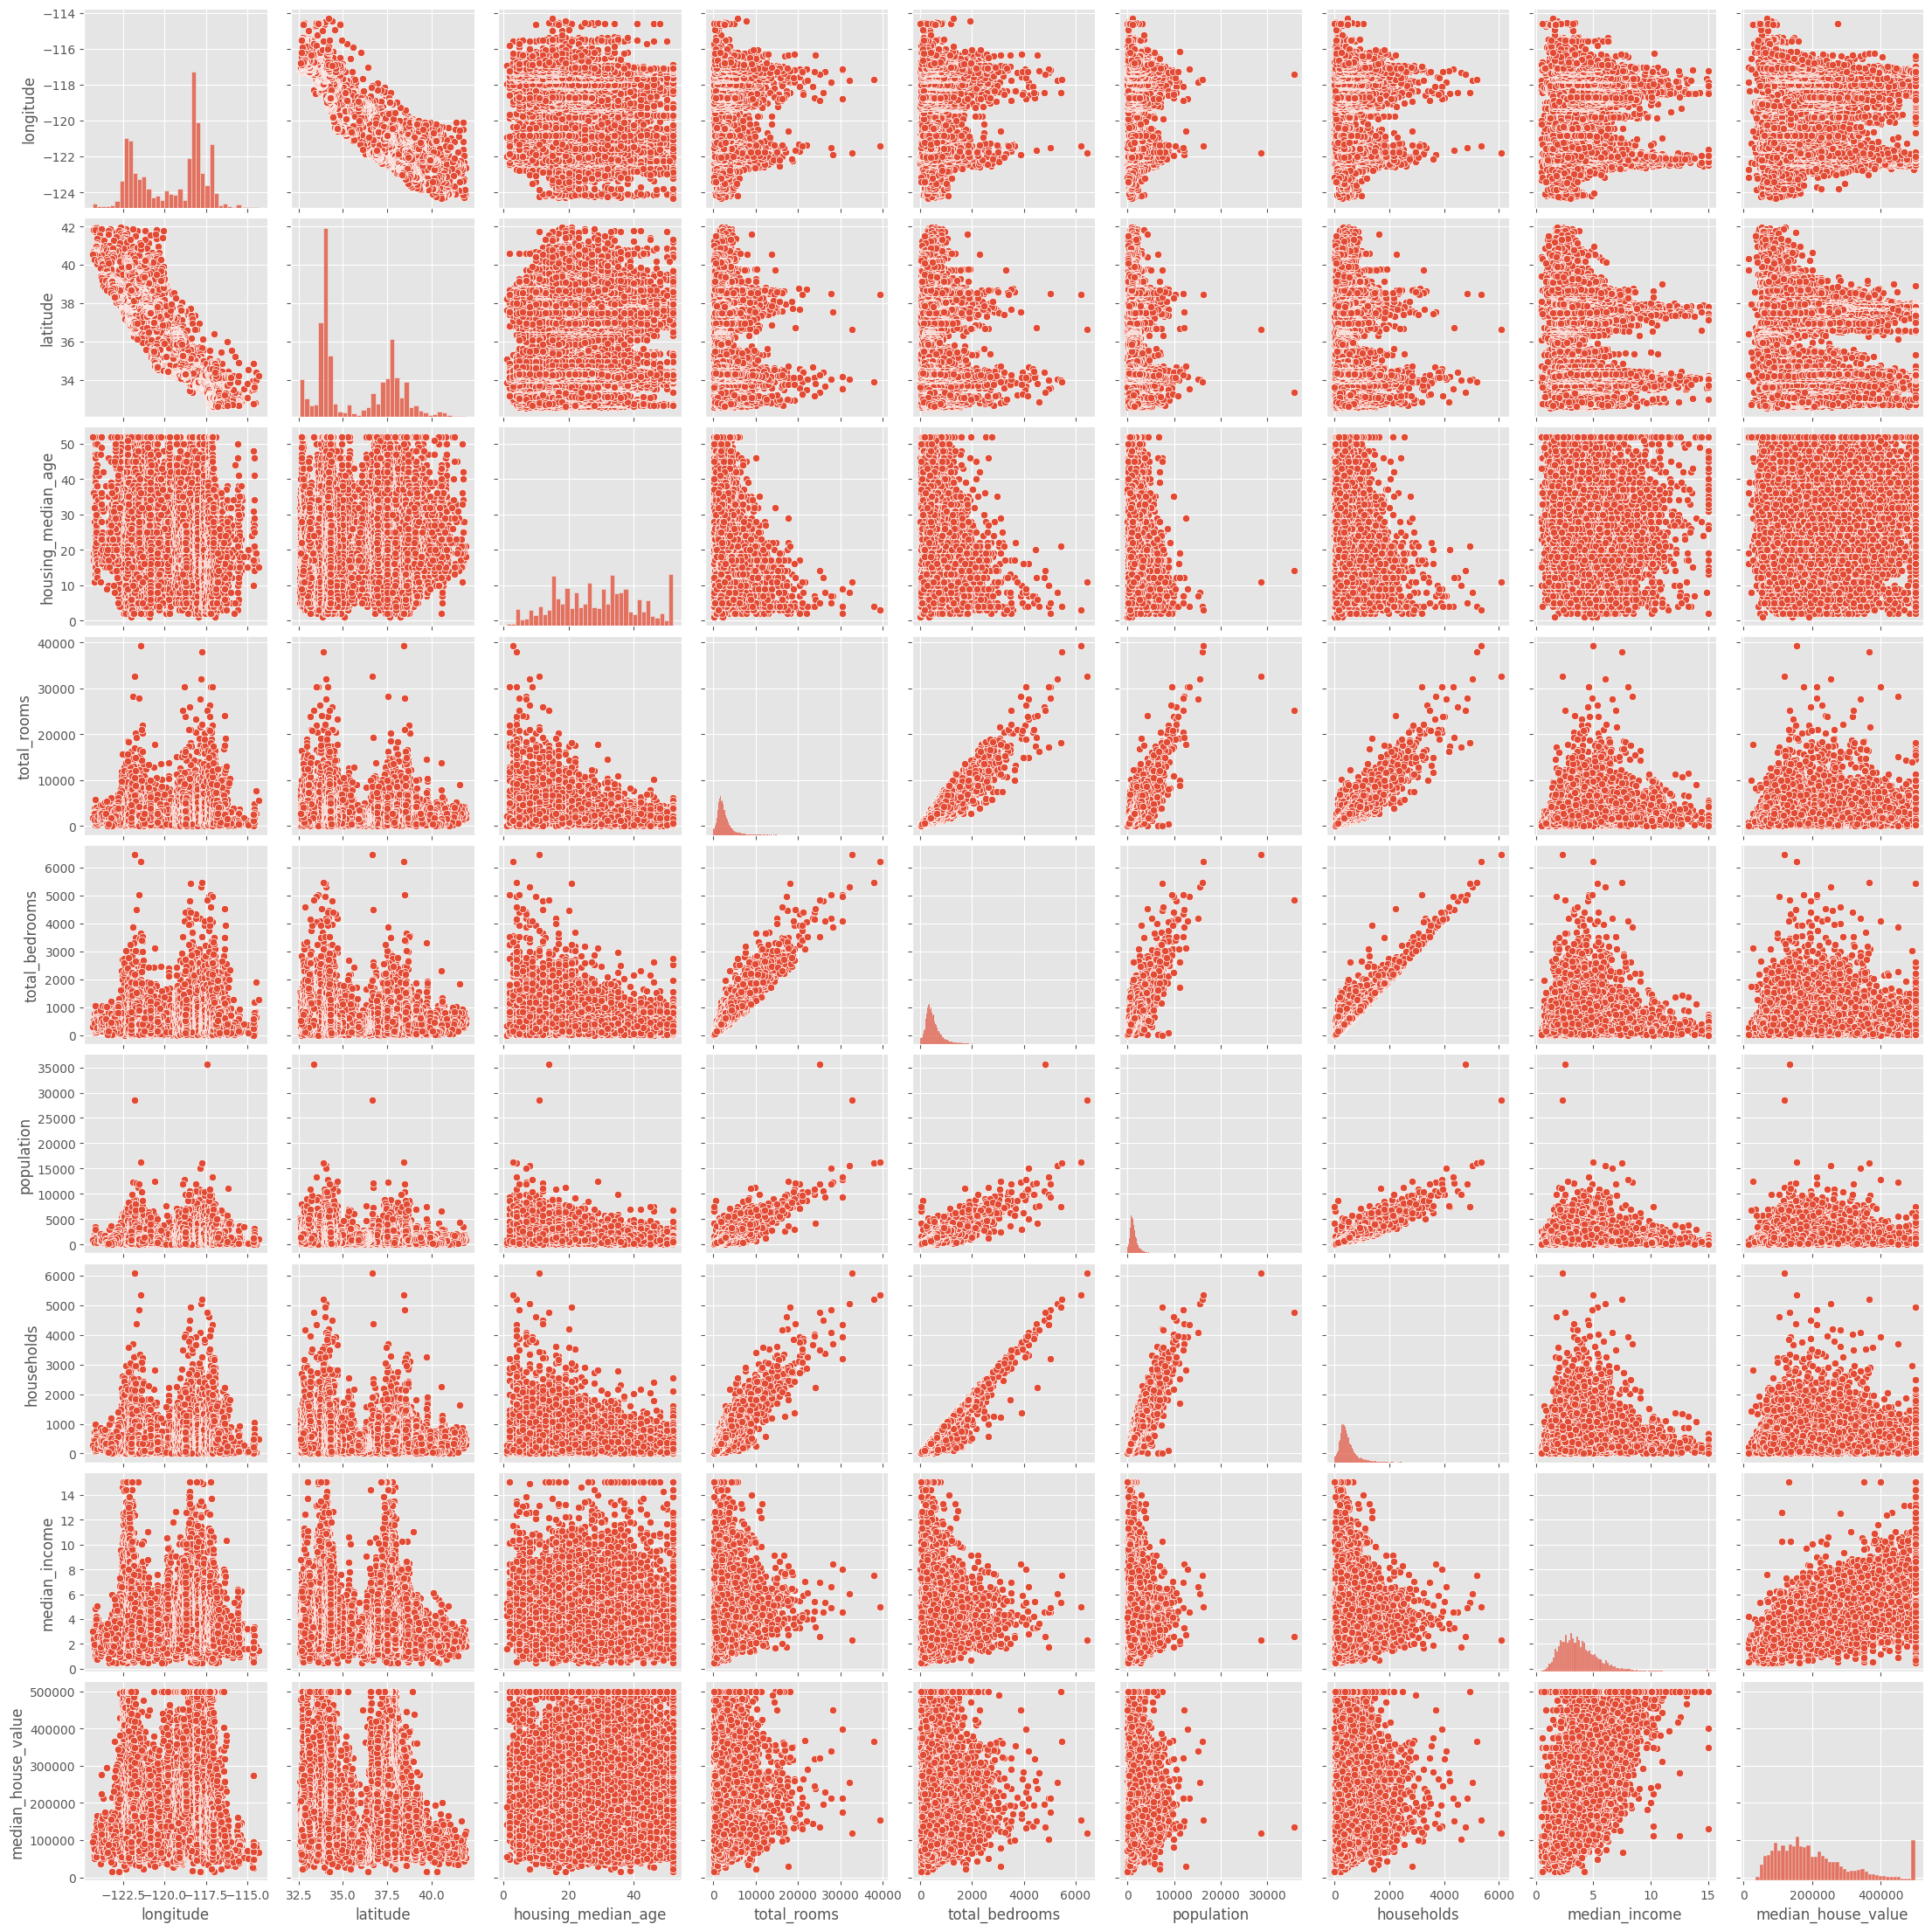

In [18]:
sns.pairplot(df);

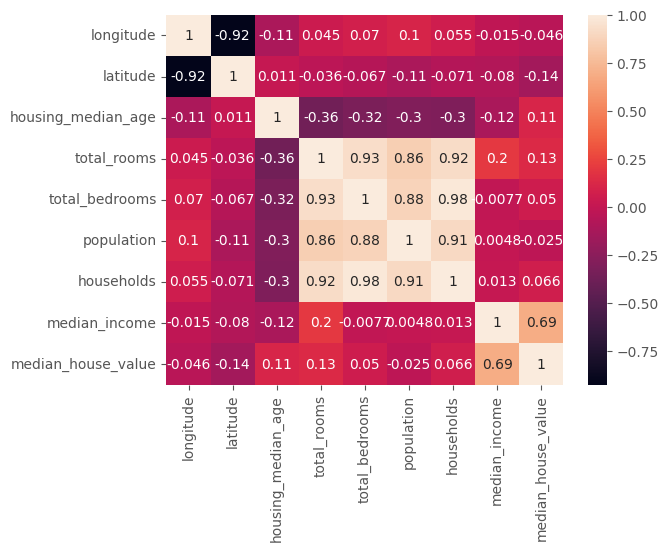

In [19]:
corr_matrix = df.drop('ocean_proximity', axis=1).corr()
sns.heatmap(corr_matrix, annot=True);

Support Vector Machine

In [ ]:
svm = SVR()